<a href="https://colab.research.google.com/github/signLangProjectNIC/tf-cnn-lstm4/blob/main/tf_cnn_lstm11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.64.22.170:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.64.22.170:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.64.22.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")

Mounted at /content/gdrive


In [ ]:
print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
import numpy as np
import tensorflow.keras.layers as tfKL
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd

nLookback=4
height=50
width=50
channels=3
nCategories=8

In [4]:
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  
  traini,testi=train_test_split(wholeset,test_size=0.22)
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])

In [5]:
print(np.shape(trainSetX))
print(np.shape(testSetX))
print(np.shape(trainSetY))
print(np.shape(testSetY))

(310, 20, 50, 50, 3)
(92, 20, 50, 50, 3)
(310,)
(92,)


In [6]:
from tensorflow.keras import regularizers

In [7]:
def dropout(rate=0.5,time_dist=False,trainable=True):
  with tpu_strategy.scope(): 
    layer=tfKL.Dropout(rate,trainable=trainable)
    if time_dist==False:
      return layer
    else:
      return tfKL.TimeDistributed(layer)

In [8]:
def dense(units=nCategories,activation='relu',trainable=True,time_dist=False,reg=list((0.01,0.01,0.01))):
  with tpu_strategy.scope(): 
    # layer=tfKL.Dense(units=units,activation=activation,trainable=trainable,kernel_regularizer=regularizers.l2(l2=reg[0]),
    # bias_regularizer=regularizers.l2(l2=reg[1]),
    # activity_regularizer=regularizers.l2(l2=reg[2]))
    layer=tfKL.Dense(units=units,activation=activation,trainable=trainable)
    if time_dist==True:
      return tfKL.TimeDistributed(layer)
    else:
      return layer

In [9]:
def maxPooling3D(pool_size=(2,2,2),trainable=True,timeDist=False):
  with tpu_strategy.scope(): 
    layer=tfKL.MaxPooling3D(pool_size=pool_size,trainable=trainable)
    if timeDist==False :
      return layer
    else:
      return tfKL.TimeDistributed(layer)

In [10]:
def flatten(timeDist=False,trainable=True):
  with tpu_strategy.scope(): 
    layer=tfKL.Flatten(trainable=trainable)
    if timeDist==True:
      return tfKL.TimeDistributed(layer)
    else:
      return tfKL.Flatten(layer)

In [11]:
def LSTM(units=100,activation='tanh',return_sequences=False,trainable=True,timeDist=False,reg=list((0.01,0.01,0.01))):
  with tpu_strategy.scope(): 
    # layer=tfKL.LSTM(units=units,activation=activation,trainable=trainable,return_sequences=return_sequences,kernel_regularizer=regularizers.l2(l2=reg[0]),
    # bias_regularizer=regularizers.l2(l2=reg[1]),
    # activity_regularizer=regularizers.l2(l2=reg[2]))
    layer=tfKL.LSTM(units=units,activation=activation,trainable=trainable,return_sequences=return_sequences)
    if timeDist==False:
      return layer
    else:
      return tfKL.TimeDistributed(layer)

In [12]:
def conv2D(filters=64,kernel_size=(3,3),activation='relu',trainable=True,timeDist=False,input_shape=(None,nLookback,height,width,channels),reg=list((0.01,0.01,0.01))):
  with tpu_strategy.scope(): 
    # layer=tfKL.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,trainable=trainable,kernel_regularizer=regularizers.l2(l2=reg[0]),
    # bias_regularizer=regularizers.l2(l2=reg[1]),
    # activity_regularizer=regularizers.l2(l2=reg[2]))
    layer=tfKL.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,trainable=trainable)
    if timeDist==True :
      if input_shape!=None:
        return tfKL.TimeDistributed(layer,input_shape=input_shape)
      else:
        return tfKL.TimeDistributed(layer)
    else:
      return layer

In [13]:
def createModel(layers,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam'):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    # model.add(conv2D(timeDist=True))
    # model.add(dropout(time_dist=True))
    # model.add(maxPooling3D(timeDist=True))
    # model.add(conv2D(timeDist=True,input_shape=None))
    # model.add(dropout(time_dist=True))
    # model.add(maxPooling3D(timeDist=True))
    # model.add(flatten(timeDist=True))
    # model.add(LSTM())
    # model.add(dropout())
    # model.add(LSTM())
    # model.add(dropout())
    # model.add(dense(units=100,activation='relu'))
    # model.add(dense(activation='softmax'))
    #(conv2D(timeDist=True),dropout(time_dist=True),maxPooling3D(timeDist=True),
    # conv2D(timeDist=True,input_shape=None),dropout(time_dist=True),maxPooling3D(timeDist=True),flatten(timeDist=True),LSTM(),dropout(),LSTM(),dropout(),dense(units=100,activation='relu'),dense(activation='softmax'))
    for layer in layers:
      model.add(layer)
    model.compile(metrics=metrics,loss=loss,optimizer=optimizer)    
    return model

In [14]:
def evaluateModel(layers,trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam',nSubsequences=5,nLookback=4,nCategories=8,verbose=0,epochs=30,batch_size=10):
  
  with tpu_strategy.scope(): 
    trainX=np.asarray(trainX)
    trainY=np.asarray(trainY)
    valX=np.asarray(valX)
    valY=np.asarray(valY)
    height=trainX.shape[2]
    width=trainX.shape[3]
    channels=trainX.shape[4]
    trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
    trainY=tf.keras.utils.to_categorical(trainY)

    
    valX=valX.reshape((valX.shape[0],nSubsequences,nLookback,valX.shape[2],valX.shape[3],valX.shape[4]))
    valY=tf.keras.utils.to_categorical(valY)
  print(np.shape(trainX))
  print(np.shape(trainY))
  print(np.shape(valX))
  print(np.shape(valY))
  with tpu_strategy.scope():
    model=createModel(layers=layers,metrics=metrics,loss=loss,optimizer=optimizer)
    history=model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_data =(valX,valY))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



In [ ]:
layers=list((conv2D(timeDist=True),dropout(time_dist=True),conv2D(timeDist=True,input_shape=None),dropout(time_dist=True),maxPooling3D(timeDist=True),flatten(timeDist=True),LSTM(return_sequences=True),dropout(),LSTM(),dropout(),dense(units=100,activation='relu'),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=50)

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


InvalidArgumentError: ignored

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


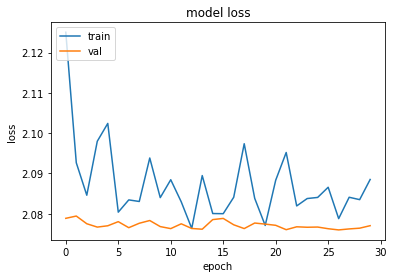

In [ ]:
layers=list((conv2D(timeDist=True),dropout(time_dist=True),conv2D(timeDist=True,input_shape=None),dropout(time_dist=True),maxPooling3D(timeDist=True),flatten(timeDist=True),LSTM(return_sequences=True),dropout(),LSTM(),dropout(),dense(units=100,activation='relu'),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(layers=layers)

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


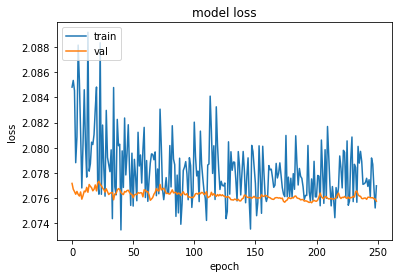

In [ ]:
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=250)

In [ ]:
#use of dropout causes the val loss to be much smaller that train loss

In [ ]:
layers=list((conv2D(timeDist=True),conv2D(timeDist=True,input_shape=None),maxPooling3D(timeDist=True),flatten(timeDist=True),LSTM(return_sequences=True),LSTM(),dense(units=100,activation='relu'),dense(activation='softmax')))

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


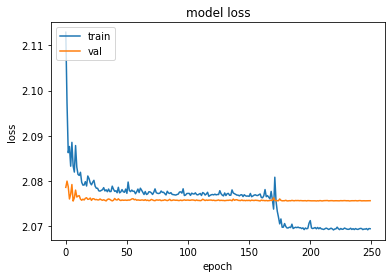

In [ ]:
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=250)

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


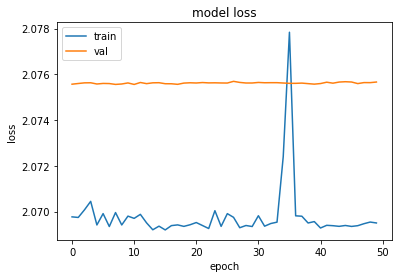

In [ ]:
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=50)

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


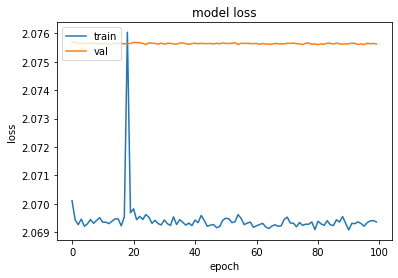

In [ ]:
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=100)

In [15]:
def conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True,timeDist=False,input_shape=(None,nLookback,height,width,channels)):
  with tpu_strategy.scope(): 
    layer=tfKL.Conv3D(filters=filters,kernel_size=kernel_size,activation=activation,trainable=trainable)
    if(timeDist==True):
      if(input_shape!=None):
        return tfKL.TimeDistributed(layer,input_shape=input_shape)
      else:
        return tfKL.TimeDistributed(layer)
    else:
      return layer

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


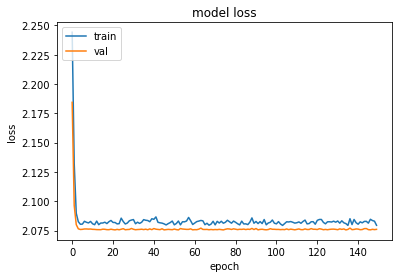

In [ ]:
layers=list((conv3D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=150)

In [ ]:
#clearly overfitting takes place

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


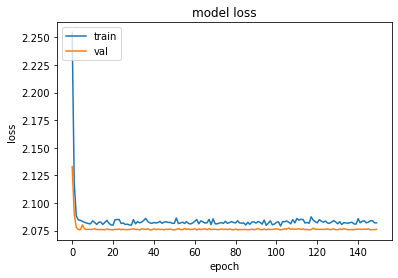

In [ ]:
layers=list((conv2D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=150)

In [ ]:
# its better to even normalize the data

In [16]:
layers=list((conv2D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(layers=layers,epochs=150)

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


KeyboardInterrupt: ignored

In [17]:
from sklearn import preprocessing
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
X=(X-Xmean)/Xstd

Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  
  traini,testi=train_test_split(wholeset,test_size=0.22)
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])

76.08792970149254
37.221323957827764
-7.58063079786192e-17
0.9999999999999996


(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


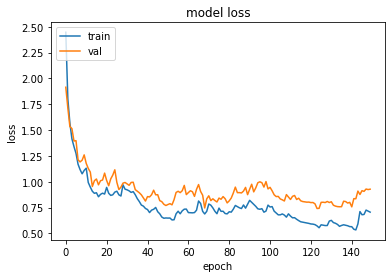

In [ ]:
layers=list((conv3D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=150)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


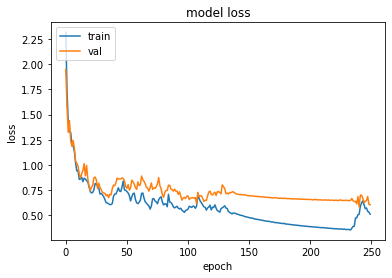

In [ ]:
layers=list((conv3D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=250)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/250
31/31 - 21s - loss: 2.5096 - accuracy: 0.2290 - val_loss: 2.1678 - val_accuracy: 0.2826
Epoch 2/250
31/31 - 6s - loss: 1.8794 - accuracy: 0.3581 - val_loss: 1.7609 - val_accuracy: 0.3261
Epoch 3/250
31/31 - 6s - loss: 1.7171 - accuracy: 0.3903 - val_loss: 1.7293 - val_accuracy: 0.3478
Epoch 4/250
31/31 - 6s - loss: 1.6334 - accuracy: 0.4935 - val_loss: 1.5654 - val_accuracy: 0.5326
Epoch 5/250
31/31 - 6s - loss: 1.5455 - accuracy: 0.5419 - val_loss: 1.5340 - val_accuracy: 0.5652
Epoch 6/250
31/31 - 6s - loss: 1.5066 - accuracy: 0.5968 - val_loss: 1.3914 - val_accuracy: 0.6196
Epoch 7/250
31/31 - 6s - loss: 1.5200 - accuracy: 0.5613 - val_loss: 1.4462 - val_accuracy: 0.5978
Epoch 8/250
31/31 - 6s - loss: 1.4173 - accuracy: 0.6194 - val_loss: 1.3397 - val_accuracy: 0.7065
Epoch 9/250
31/31 - 6s - loss: 1.3323 - accuracy: 0.6806 - val_loss: 1.2456 - val_accuracy: 0.6087
Epoch 10/250
31/31 - 6s - loss: 1.3471 - accur

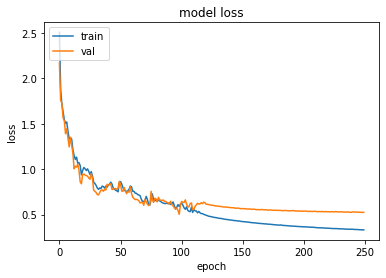

In [18]:
layers=list((conv2D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=250,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/250
31/31 - 16s - loss: 2.7412 - accuracy: 0.1484 - val_loss: 2.3363 - val_accuracy: 0.1413
Epoch 2/250
31/31 - 3s - loss: 2.1482 - accuracy: 0.2065 - val_loss: 2.0190 - val_accuracy: 0.2391
Epoch 3/250
31/31 - 3s - loss: 1.9226 - accuracy: 0.2710 - val_loss: 1.7695 - val_accuracy: 0.5000
Epoch 4/250
31/31 - 3s - loss: 1.7943 - accuracy: 0.3645 - val_loss: 1.7953 - val_accuracy: 0.3913
Epoch 5/250
31/31 - 3s - loss: 1.7209 - accuracy: 0.4613 - val_loss: 1.5992 - val_accuracy: 0.5000
Epoch 6/250
31/31 - 4s - loss: 1.6779 - accuracy: 0.4194 - val_loss: 1.6488 - val_accuracy: 0.4565
Epoch 7/250
31/31 - 3s - loss: 1.6560 - accuracy: 0.4710 - val_loss: 1.6021 - val_accuracy: 0.4783
Epoch 8/250
31/31 - 3s - loss: 1.5912 - accuracy: 0.4839 - val_loss: 1.5660 - val_accuracy: 0.4457
Epoch 9/250
31/31 - 3s - loss: 1.5125 - accuracy: 0.5355 - val_loss: 1.4989 - val_accuracy: 0.5870
Epoch 10/250
31/31 - 3s - loss: 1.5176 - accur

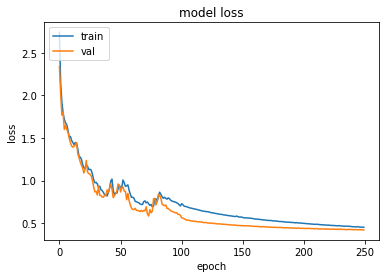

In [19]:
layers=list((conv3D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=250,verbose=2)
  

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)


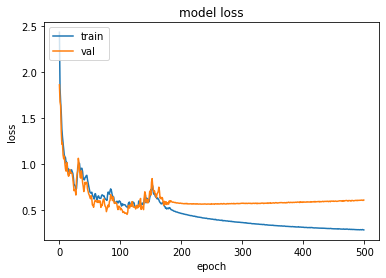

In [20]:
layers=list((conv3D(timeDist=True),flatten(timeDist=True),LSTM(),dense(activation='softmax')))
with tpu_strategy.scope(): 
  evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=500,verbose=0)
  

In [ ]:
#this is the best we have gotten this far